In [62]:
#jesus david hurtado
#Se va a calcular el gradiente de la función de costo, 
#se  minimiza en la dirección opuesta del gradiente 
#usando el hiperparametro LR. 
#Se pasara una función de gradiente () al optimizador y pedirle que encuentre el conjunto óptimo de parámetros para nuestro modelo;
#La función de ajuste podría entonces ejecutar el optimizador para ajustar los datos. 


In [63]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [64]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

Note that in the implementation above we added an option to record the history of model parameter's during gradient descent for the purpose of visualization.
Let's reimplement the `LinearRegression` class to use an optimizer.

In [65]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [66]:
x

array([7.19827015, 3.82405334, 5.33017401, ..., 1.55103522, 3.55834054,
       5.12429862])

Now let's fit this model to to the toy data we saw in the linear regression notebook.

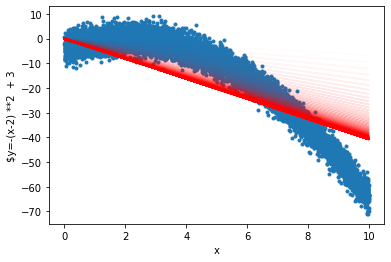

In [67]:
#Inicializamos los valores de x y encontramos los valores de la funcion

N = 10000
x = np.random.rand(N) * 10
y = -  ( x - 2 ) **2  + 3 * np.random.randn(N)

optimizer = GradientDescent(learning_rate=.005, max_iters=100, record_history=True)
model = LinearRegression()
model.fit(x,y, optimizer)
plt.plot(x, y, '.')
for t,w in enumerate(optimizer.w_history):
    plt.plot(x, x*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
plt.xlabel('x')
plt.ylabel(r'$y=-(x-2) **2  + 3')
#plt.xlim(-20,20)
#plt.ylim(-100,100)

plt.show()

In [68]:


#Cuál es el máximo valor que encontró el algoritmo y para qué valor de x? 
max_value = np.max(y)
print(max_value)
# por la grafica para el valor 2.2





9.038710228401895


In [69]:
#¿En qué momento detuviste la búsqueda y por qué? 
# No use minibatch
#¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia? 
# Se genero una matrix de 10.000 numeros aleatorios 
# Se esta usando una matrix Lr dinamico y cambia  la convergencia

#¿Cuáles son los hiper parámetros del algoritmo?
# rta: Lr 


In [70]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

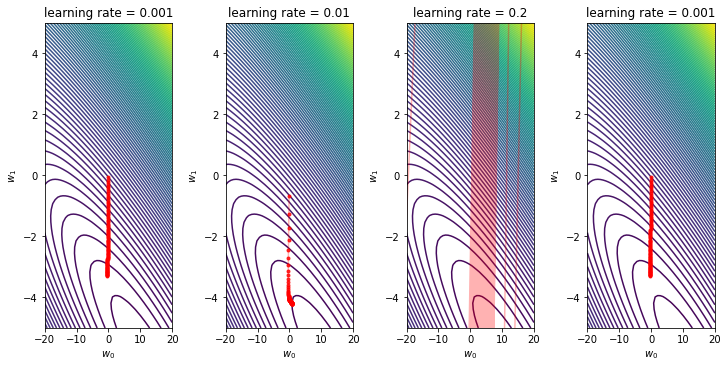

In [71]:
cost = lambda w: .5*np.mean((w[0] + w[1]*x - y)**2)
learning_rates = [.001, .01, .2,0.001]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iters=100, record_history=True)
    model = LinearRegression()
    model.fit(x,y, optimizer)
    plot_contour(cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)                  # get the history for plotting
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()